Accuracy: 0.8301
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.79      0.82      4961
           1       0.81      0.87      0.84      5039

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



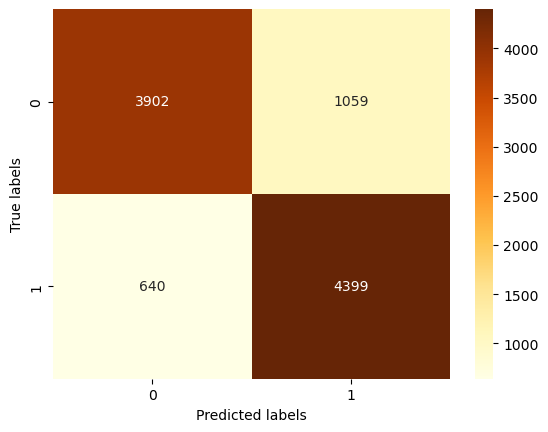

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the IMDB movie reviews dataset
df = pd.read_csv('/Users/mohitkapoor/Downloads/New code/imdb_data.csv')
df.sample(7)

# Preprocess the data
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})  # Map sentiment labels to binary values
X = df['review']  # Input text data
y = df['sentiment']  # Sentiment labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(sublinear_tf=True, encoding='utf-8', decode_error='ignore', stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train XGBoost model
model = xgb.XGBClassifier(max_depth=6, n_estimators=100, learning_rate=0.1)
model.fit(X_train_vec, y_train)

# Make predictions on test data
y_pred = model.predict(X_test_vec)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1 score
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="YlOrBr", fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

